In [1]:
#Q1
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="5y")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-31 00:00:00-04:00,12.340000,12.661333,12.273333,12.344000,156100500,0.0,0.0
2019-06-03 00:00:00-04:00,12.367333,12.445333,11.799333,11.931333,195966000,0.0,0.0
2019-06-04 00:00:00-04:00,12.073333,12.932000,11.974000,12.906667,207112500,0.0,0.0
2019-06-05 00:00:00-04:00,13.245333,13.418667,12.790000,13.106000,202662000,0.0,0.0
2019-06-06 00:00:00-04:00,13.629333,14.066667,13.453333,13.730000,303633000,0.0,0.0


In [2]:
#Q2-prototype
from bs4 import BeautifulSoup

html_data = """
<div class="row lv-0 svelte-1xjz32c"><div class="column sticky svelte-1xjz32c"> <div class="rowTitle svelte-1xjz32c" title="Total Unusual Items Excluding Goodwill">Total Unusual Items Excluding Goodwill</div></div> <div class="column svelte-1xjz32c alt">-- </div><div class="column svelte-1xjz32c">-- </div><div class="column svelte-1xjz32c alt">-176,000 </div><div class="column svelte-1xjz32c">27,000 </div><div class="column svelte-1xjz32c alt">-- </div></div>
<div class="row lv-0 svelte-1xjz32c"><div class="column sticky svelte-1xjz32c"> <div class="rowTitle svelte-1xjz32c" title="Total Unusual Items">Total Unusual Items</div></div> <div class="column svelte-1xjz32c alt">-- </div><div class="column svelte-1xjz32c">-- </div><div class="column svelte-1xjz32c alt">-176,000 </div><div class="column svelte-1xjz32c">27,000 </div><div class="column svelte-1xjz32c alt">-- </div></div>
<div class="row lv-0 svelte-1xjz32c"><div class="column sticky svelte-1xjz32c"> <div class="rowTitle svelte-1xjz32c" title="Normalized EBITDA">Normalized EBITDA</div></div> <div class="column svelte-1xjz32c alt">13,796,000 </div><div class="column svelte-1xjz32c">14,796,000 </div><div class="column svelte-1xjz32c alt">17,833,000 </div><div class="column svelte-1xjz32c">9,598,000 </div><div class="column svelte-1xjz32c alt">4,224,000 </div></div>
<div class="row lv-0 svelte-1xjz32c"><div class="column sticky svelte-1xjz32c"> <div class="rowTitle svelte-1xjz32c" title="Tax Rate for Calcs">Tax Rate for Calcs</div></div> <div class="column svelte-1xjz32c alt">0 </div><div class="column svelte-1xjz32c">0 </div><div class="column svelte-1xjz32c alt">0 </div><div class="column svelte-1xjz32c">0 </div><div class="column svelte-1xjz32c alt">0 </div></div>
<div class="row lv-0 svelte-1xjz32c"><div class="column sticky svelte-1xjz32c"> <div class="rowTitle svelte-1xjz32c" title="Tax Rate for Calcs">Tax Rate for Calcs</div></div> <div class="column svelte-1xjz32c alt">0 </div><div class="column svelte-1xjz32c">0 </div><div class="column svelte-1xjz32c alt">0 </div><div class="column svelte-1xjz32c">0 </div><div class="column svelte-1xjz32c alt">0 </div></div>
"""

soup = BeautifulSoup(html_data, 'html.parser')

rows = soup.find_all('div', class_='row lv-0 svelte-1xjz32c')

last_five_rows = rows[-5:]

for row in last_five_rows:
  cells = row.find_all('div', class_=lambda c: c and c.startswith('column'))
  for cell in cells:
    print(cell.text.strip())  # Remove leading/trailing whitespace

Total Unusual Items Excluding Goodwill
--
--
-176,000
27,000
--
Total Unusual Items
--
--
-176,000
27,000
--
Normalized EBITDA
13,796,000
14,796,000
17,833,000
9,598,000
4,224,000
Tax Rate for Calcs
0
0
0
0
0
Tax Rate for Calcs
0
0
0
0
0


In [3]:
#Q2
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if ('Tesla Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','')
                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue})

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue


In [4]:
#Q3
import yfinance as yf
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="5y")
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-31 00:00:00-04:00,1.8675,1.9150,1.8300,1.8950,15932400,0.0,0.0
2019-06-03 00:00:00-04:00,1.8950,1.9125,1.8550,1.8675,20916400,0.0,0.0
2019-06-04 00:00:00-04:00,1.8950,1.9625,1.8800,1.9550,41720400,0.0,0.0
2019-06-05 00:00:00-04:00,1.3725,1.3975,1.1775,1.2600,157416800,0.0,0.0
2019-06-06 00:00:00-04:00,1.2450,1.2825,1.2100,1.2825,54232000,0.0,0.0


In [5]:
#Q4
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")
gamestop = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):
    if ('Gamestop Quarterly Revenue' in table.find('th').text):
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')
            
            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','')
                gamestop = gamestop.append({"Date":date, "Revenue":revenue})

gamestop = gamestop[gamestop['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue


In [47]:
#Q4-prototype
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

data = []

table = soup.find("table", class_="historical_data_table table")

if table:
    for row in tbody.find_all("tr"):
        col = row.find_all("td")
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        
        if revenue:  
            data.append({"Date": date, "Revenue": revenue})
    
    gme_revenue = pd.DataFrame(data)

    gme_revenue.dropna(inplace=True)

    print(gme_revenue.tail())

    gme_revenue.to_csv('/mnt/data/gme_revenue_tail.csv', index=False)
else:
    print("tbody not found in the HTML content")


tbody not found in the HTML content


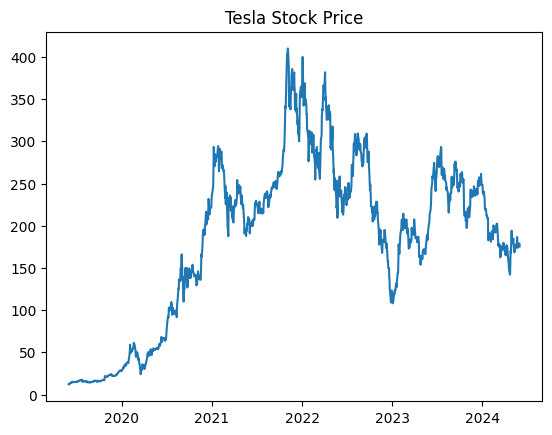

In [6]:
#Q5
import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig, ax = plt.subplots()
ax.plot(tesla_data.index, tesla_data['Close'])
ax.set_title("Tesla Stock Price")
plt.show()

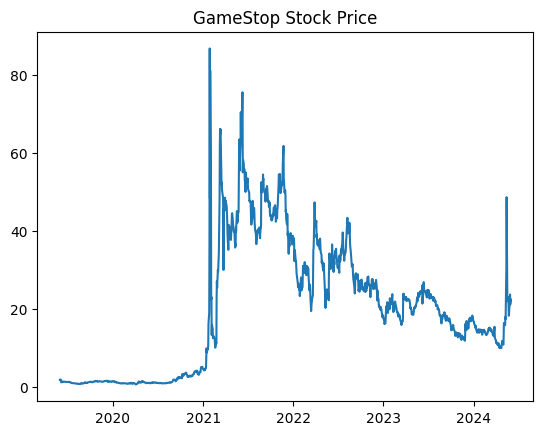

In [7]:
#Q6
import matplotlib.pyplot as plt
import plotly.graph_objects as go

fig, ax = plt.subplots()
ax.plot(gamestop_data.index, gamestop_data['Close'])
ax.set_title("GameStop Stock Price")
plt.show()